In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import pos_tag
from nltk.tag import pos_tag

import newspaper
from newspaper import Article

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

import re
import time
import string
import json
import operator
from collections import Counter

import matplotlib.pyplot as plt

import glob

In [2]:
#belakangan
header = ["GlobalEventId", "sqldate", "MonthYear","Year",
               "Actor1Code","Actor1Name","Actor1CountryCode","Actor1KnownGroupCode","Actor1Type1Code",
               "Actor2Code","Actor2Name","Actor2CountryCode","Actor2KnownGroupCode","Actor2Type1Code",
               "IsRootEvent","EventCode","EventBaseCode","EventRootCode",
               "QuadClass","GoldsteinScale","NumMentions","NumSources","NumArticles","AvgTone",
               "Actor1Geo_FullName","Actor1Geo_CountryCode","Actor1Geo_ADM1Code","Actor1Geo_Lat","Actor1Geo_Long",
               "Actor2Geo_FullName","Actor2Geo_CountryCode","Actor2Geo_ADM1Code","Actor2Geo_Lat","Actor2Geo_Long",
               "ActionGeo_FullName","ActionGeo_CountryCode","ActionGeo_ADM1Code","ActionGeo_Lat","ActionGeo_Long",
               "SOURCEURL"]

In [3]:
#belakangan
#ubah path_clean sesuai tempat clean di lokal
path_clean = 'E:/digitalent-project/hehe/all-clean3.csv'
#path_clean = 'E:/digitalent-project/csv/2017-clean.csv'
data_gdelt = pd.read_csv(path_clean, delimiter = ',', encoding = "ISO-8859-1", names=header)
data_gdelt.sample(4)

C:\Users\tryviana\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,14,15,16,17,18,19,20,21,22,23,27,28,32,33,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GlobalEventId,sqldate,MonthYear,Year,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1Type1Code,Actor2Code,...,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,SOURCEURL
186335,627905806,20170215,201702,2017,NaN,NaN,NaN,NaN,NaN,USA,...,US,USKY,38.4784,-82.6379,"Ashland, Kentucky, United States",US,USKY,38.4784,-82.6379,http://www.dailyindependent.com/news/fallsburg...
1023517,693202356,20170927,201709,2017,USA,ALABAMA,USA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Mississippi, United States",US,USMS,32.7673,-89.6812,http://wbtw.com/ap/in-alabama-a-mcconnell-rebu...
756078,672194376,20170711,201707,2017,CHN,CHINESE,CHN,NaN,NaN,CRM,...,CH,CH03,28.8184,115.433,"Ganzhou, Jiangxi, China",CH,CH03,28.8184,115.433,http://www.nbc-2.com/story/35856677/china-labo...
1749779,742797453,20180328,201803,2018,MED,SPOKESMAN,NaN,NaN,MED,NGA,...,NI,NI57,12.1628,6.66135,"Anka, Zamfara, Nigeria",NI,NI57,12.1138,5.92427,http://punchng.com/gunmen-kill-three-in-zamfara/


In [13]:
df17 = data_gdelt[data_gdelt['Year']==2017]

In [14]:
df18 = data_gdelt[data_gdelt['Year']==2018]

In [8]:
txtFiles = glob.glob("E:/gdelt/2017/2017tar/*.txt")

In [44]:
txtFiles18 = glob.glob("E:/gdelt/2018/2018tar/*.txt")

In [10]:
dfTxt = pd.DataFrame(txtFiles, columns=['File'])
dfTxt['File'] = dfTxt['File'].str.replace('E:/gdelt/2017/2017tar', '')
dfTxt['File'] = dfTxt['File'].str.replace('\\', '')
dfTxt['File'] = dfTxt['File'].str.replace('.txt', '')

In [11]:
dfTxt.File.values

array(['613248567', '613248634', '613248659', ..., '634419818',
       '634419838', '634419972'], dtype=object)

In [45]:
dfTxt18 = pd.DataFrame(txtFiles18, columns=['File'])
dfTxt18['File'] = dfTxt18['File'].str.replace('E:/gdelt/2018/2018tar', '')
dfTxt18['File'] = dfTxt18['File'].str.replace('\\', '')
dfTxt18['File'] = dfTxt18['File'].str.replace('.txt', '')

In [26]:
type(df17['GlobalEventId'])

pandas.core.series.Series

In [40]:
df17['GlobalEventId'] = df17['GlobalEventId'].astype(str)

C:\Users\tryviana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df18['GlobalEventId'] = df18['GlobalEventId'].astype(str)

C:\Users\tryviana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
df17['GlobalEventId'].dtype

dtype('O')

# Remove lom discap

In [43]:
dfClean17 = df17[df17['GlobalEventId'].isin(dfTxt.File.values)]
len(dfClean17)

198480

In [16]:
df17.head(3)

,GlobalEventId,sqldate,MonthYear,Year,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1Type1Code,Actor2Code,...,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,SOURCEURL
16384,614692016,20170106,201701,2017,BUS,BANK,NaN,NaN,BUS,NaN,...,NaN,NaN,NaN,NaN,Israel,IS,IS,31.5,34.75,http://www.mankatofreepress.com/opinion/letter...
16385,614692017,20170106,201701,2017,BUS,BANK,NaN,NaN,BUS,NaN,...,NaN,NaN,NaN,NaN,Mexico,MX,MX,23,-102,http://www.mankatofreepress.com/opinion/letter...
16386,614692018,20170106,201701,2017,BUS,BANK,NaN,NaN,BUS,NaN,...,NaN,NaN,NaN,NaN,Panama,PM,PM,9,-80,http://www.mankatofreepress.com/opinion/letter...


In [48]:
dfClean18 = df18[df18['GlobalEventId'].isin(dfTxt18.File.values)]
len(dfClean18)

1577

In [49]:
dfRandom17 = dfClean17.sample(1500)

In [57]:
dfRandom17.to_csv("dfRandom17.csv", index=False, mode='w')

In [50]:
dfRandom18 = dfClean18.sample(1500)

In [58]:
dfRandom18.to_csv("dfRandom18.csv", index=False, mode='w')

In [83]:
dfr17 = dfRandom17.iloc[:2,:]
dfr17

,GlobalEventId,sqldate,MonthYear,Year,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1Type1Code,Actor2Code,...,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,SOURCEURL
107222,622030006,20170130,201701,2017,GOV,PRESIDENT,NaN,NaN,GOV,BWA,...,BC,BC00,-20.05,24.9833,"Khama, Botswana (general), Botswana",BC,BC00,-20.05,24.9833,http://www.sundaystandard.info/lieutenant-gene...
158223,625781321,20170209,201702,2017,USA,UNITED STATES,USA,NaN,NaN,JUD,...,US,USMA,42.2373,-71.5314,"Massachusetts, United States",US,USMA,42.2373,-71.5314,http://www.cleveland.com/politics/index.ssf/20...


In [64]:
ps = nltk.stem.PorterStemmer()
stop_words = set(stopwords.words('english'))

In [105]:
totalCorpus = len(dfRandom18)
processLine = 0
for index, row in dfRandom18.iterrows():
    filename = ("E:/gdelt/2018/2018tar/" + str(row['GlobalEventId']) + ".txt").replace('.0', '')
    GlobalEventId = (str(row['GlobalEventId'])).replace('.0', '')
    file = open(filename, "r", encoding="utf8") 
    
    txt = file.read()
    
    #lowercase
    txt = txt.lower()
    
    #change nonword to space   
    txt_clean = re.sub(r'[^a-zA-Z]', ' ', txt)
    
    #TOKENISASI , STEM, HAPUS PROPERNOUN, DAN HAPUS STOPWORD
    tagged_sentence = nltk.pos_tag(txt_clean.split())
    
    filtered_sentence=[]
    for initword, tag in tagged_sentence:
        word = ps.stem(initword)
        if len(word)>2 and (word not in stop_words) and tag != 'NNP' and tag != 'NNPS':
            filtered_sentence.append(word)
    res = ' '.join(filtered_sentence)       
    #print(res)
    #dfRandom18.loc[dfRandom18.GlobalEventId == int(GlobalEventId), 'text'] = str(res)
    row['text'] = str(res)
    
    processLine+=1
    if processLine % 100 == 0:
        print(str(processLine) + "/" + str(totalCorpus))


100/1500
200/1500
300/1500
400/1500
500/1500
600/1500
700/1500
800/1500
900/1500
1000/1500
1100/1500
1200/1500
1300/1500
1400/1500
1500/1500


In [106]:
dfRandom18.head()['text']

1393392    peru kuczynski pardon fujimori save skinalexia...
1393403    armi hand demolit order target home detaine ne...
1393814    azerbaijan accus armenia shell nine villag jan...
1392965    najib say forex rci respons kit siang calla pr...
1393313    two peopl kill iran protest southwest know whe...
Name: text, dtype: object

In [108]:
dfRandom18.to_csv("dfRandom18text.csv", index=False, mode='w')

In [79]:
dfRandom17.head(3)

,GlobalEventId,sqldate,MonthYear,Year,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1Type1Code,Actor2Code,...,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,SOURCEURL
107222,622030006,20170130,201701,2017,GOV,PRESIDENT,NaN,NaN,GOV,BWA,...,BC,BC00,-20.05,24.9833,"Khama, Botswana (general), Botswana",BC,BC00,-20.05,24.9833,http://www.sundaystandard.info/lieutenant-gene...
158223,625781321,20170209,201702,2017,USA,UNITED STATES,USA,NaN,NaN,JUD,...,US,USMA,42.2373,-71.5314,"Massachusetts, United States",US,USMA,42.2373,-71.5314,http://www.cleveland.com/politics/index.ssf/20...
198182,628709639,20170217,201702,2017,NaN,NaN,NaN,NaN,NaN,BDI,...,BY,BY00,-3.37611,29.36,"Bujumbura, Burundi (general), Burundi",BY,BY00,-3.37611,29.36,https://www.yahoo.com/news/burundi-seeks-arres...


In [80]:
dfRandom18.head(3)

,GlobalEventId,sqldate,MonthYear,Year,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1Type1Code,Actor2Code,...,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,SOURCEURL
1393392,719103658,20180101,201801,2018,MIL,MILITARY GROUP,NaN,NaN,MIL,PER,...,PE,PE13,-7.1075,-79.5889,"Alberto Fujimori, Region de La Libertad, Peru",PE,PE13,-7.1075,-79.5889,https://intpolicydigest.org/2018/01/01/peru-s-...
1393403,719104853,20180101,201801,2018,NaN,NaN,NaN,NaN,NaN,ISR,...,IS,IS,31.5,34.75,"Industrial Zone, West Bank (general), West Bank",WE,WE00,31.5063,35.1011,http://imemc.org/article/israeli-soldiers-hand...
1393814,719134319,20180101,201801,2018,AZE,AZERBAIJAN,AZE,NaN,NaN,ARM,...,AJ,AJ40,41.2097,45.0799,"Kemerli, Qazax, Azerbaijan",AJ,AJ40,41.2097,45.0799,http://www.eng.kavkaz-uzel.eu/articles/41949/


In [109]:
dfText2017 = dfRandom17['text']

In [118]:
dfText2018 = dfRandom18['text']

In [121]:
dfText = dfText2017.append([dfText2018])
len(dfText)

3000

In [154]:
dfRandom = dfRandom17.append(dfRandom18)

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dfText)

In [138]:
X.shape

(3000, 32174)

In [142]:
type(X)

scipy.sparse.csr.csr_matrix

In [146]:
pd.DataFrame(list(X.toarray())).to_csv("TFIDF.csv", index=False, mode='w')

In [123]:
# sort vocabulary by value (for header)
header = sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))

In [124]:
len(header)

32174

In [125]:
clf10 = KMeans(n_clusters=10, verbose = 0)
clf10.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [147]:
header_tfidf=[]
for k,v in header:
    header_tfidf.append(k)

In [149]:
pd.DataFrame(header_tfidf).to_csv("header.csv", index=False, mode='w')

In [152]:
with open('header.csv', 'w') as f:
    for item in header_tfidf:
        f.write("%s," % item)

In [153]:
f.close()

In [155]:
dfRandom['labels'] = clf10.labels_

Text(0,0.5,'Frekuensi')

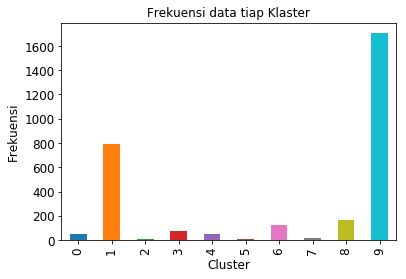

In [157]:
ax = dfRandom.groupby('labels')['labels'].count()
ax = ax.plot(kind='bar', title ="Frekuensi data tiap Klaster", fontsize=12)
ax.set_xlabel("Cluster", fontsize=12)
ax.set_ylabel("Frekuensi", fontsize=12)

In [160]:
pca = TruncatedSVD(n_components=100)
vec_matrix_pca = pca.fit_transform(X)

In [161]:
clf101 = KMeans(n_clusters=10, verbose = 0)
clf101.fit(vec_matrix_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [162]:
dfTemp = dfRandom

In [163]:
dfRandom['labels'] = clf101.labels_

Text(0,0.5,'Frekuensi')

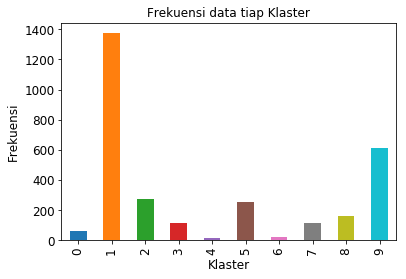

In [166]:
ax = dfRandom.groupby('labels')['labels'].count()
ax = ax.plot(kind='bar', title ="Frekuensi data tiap Klaster", fontsize=12)
ax.set_xlabel("Klaster", fontsize=12)
ax.set_ylabel("Frekuensi", fontsize=12)

In [167]:
clf101.inertia_

630.9579821894471

In [168]:
centers = np.array(clf101.cluster_centers_)

In [172]:
header_tfidf

AttributeError: 'list' object has no attribute 'shape'

In [173]:
terms = header_tfidf

original = pca.inverse_transform(clf101.cluster_centers_)
centroids = original.argsort()[:,::-1]
for i in range(10):
    print("Cluster %d:" %i),
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Cluster 0:
 north
 korea
 kim
 korean
 jong
 malaysia
 china
 nam
 south
 malaysian
Cluster 1:
 said
 thi
 govern
 year
 state
 peopl
 parti
 countri
 presid
 would
Cluster 2:
 israel
 palestinian
 isra
 attack
 said
 pakistan
 kill
 gaza
 group
 soldier
Cluster 3:
 notif
 page
 pleas
 subscript
 email
 read
 save
 gang
 servic
 account
Cluster 4:
 ngo
 fund
 gateston
 right
 human
 money
 europ
 israel
 group
 radic
Cluster 5:
 trump
 presid
 russia
 russian
 said
 elect
 obama
 donald
 democrat
 thi
Cluster 6:
 kaplan
 herald
 rape
 telegraph
 rewritten
 redistribut
 storm
 prior
 briefcopyright
 broadcast
Cluster 7:
 pakistan
 trump
 afghanistan
 tweet
 terrorist
 aid
 given
 safe
 deceit
 lie
Cluster 8:
 iran
 protest
 iranian
 rouhani
 demonstr
 tehran
 peopl
 govern
 said
 israel
Cluster 9:
 polic
 said
 charg
 arrest
 year
 offic
 counti
 man
 old
 kill
